# Basic linear regression using `scikit-learn`

Let's start with a simple 1-dimensional case. We have some input data $X_1$, some output function $y$, and we explore possible models to simulate the relationship between the two, starting with linear and progressing to polynomials.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Create some sample data that roughly follows a polynomial relationship but with some noise added.

In [67]:
x1=np.linspace(0,50,50)+2*np.random.randn(50)
y=-10 + 1.3*x1 - 0.01*x1*x1 + 2*np.random.randn(50)
#y=np.linspace(-10,40,50)+2*np.random.randn(50)
#y=-10 + 3*x1 + 10*np.random.randn(50)

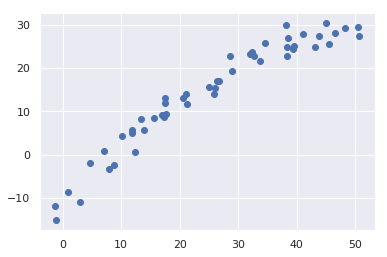

In [68]:
plt.scatter(x1,y)

Now let's assume there is a linear function $y=ax+b$ that approximates this data.

In [69]:
def f(x):
    a=1
    b=1
    return a*x+b

In [70]:
f(x1)

array([-0.1157973 , -0.3003243 ,  3.99691822,  1.88645726,  5.70165061,
       12.82183632,  8.10953946, 11.19965776,  9.68466633,  8.95023338,
       14.81847884, 12.77195036, 14.38598933, 16.60829992, 13.31260568,
       18.30521507, 18.61773774, 17.94497307, 18.54484489, 18.4810225 ,
       21.62988334, 22.18722428, 22.11811935, 26.09249248, 27.71872871,
       27.04273701, 26.92077826, 27.35939039, 30.0180176 , 33.64831882,
       29.68891946, 33.0381894 , 34.77316204, 35.60755752, 33.30045541,
       39.39998679, 39.42110266, 40.45238561, 39.22718252, 39.46044621,
       40.49825603, 42.17080293, 44.23156275, 47.52524709, 44.75522206,
       46.07653386, 51.53064199, 46.50186587, 49.25898064, 51.76501032])

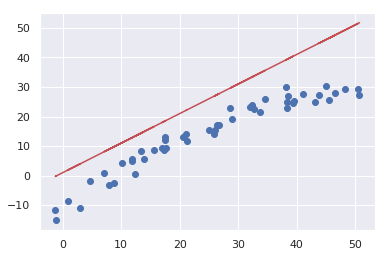

In [71]:
plt.scatter(x1,y)
plt.plot(x1,f(x1),'r')

How wrong is this? To answer that we need a loss function, which we will then attempt to minimize. We'll use mean squared error to compute loss.



In [72]:
def mse(y1,y2):
    n=len(y1)
    return sum((y1-y2)**2)/n

In [73]:
mse(y,f(x1))

164.25603272715824

So now we can compute the loss for any given pair $(a,b)$

In [74]:
def loss(a,b):
    y_computed = a*x1+b
    y_actual=y
    return mse(
        y_computed,
        y_actual
    )

In [75]:
loss(1,1)

164.25603272715824

#### Now optimize $a$ and $b$

Find the values of *a* and *b* that minimize loss. We can imagine this as finding the lowest point on a 2d surface


Most examples seem to use `np.meshgrid`. This convenience functions takes two arrays A and B and produces two 2-dimensional arrays.

In [76]:
A, B = np.meshgrid(
    np.linspace(-4,10,100),
    np.linspace(-100,100,100)
)

In [77]:
Z=np.vectorize(loss)(A,B)

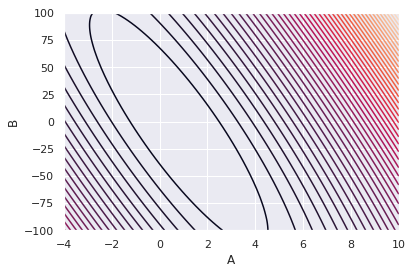

In [78]:
plt.xlabel("A")
plt.ylabel("B")
plt.contour (A,B,Z,50)

What's the smallest value of Z? What value of a and b give us that? Gradient descent is the correct way of answering that question, but approximately we have:

In [79]:
np.min(Z)

12.12223909445797

And by simply eyeballing the chart, I could pick the rough values of *a* and *b* that give me this:

In [82]:
loss(a=0.8,b=-6)

11.257079513146186

$a=0.8,b=-6$

So let's try these variables against $x_1$

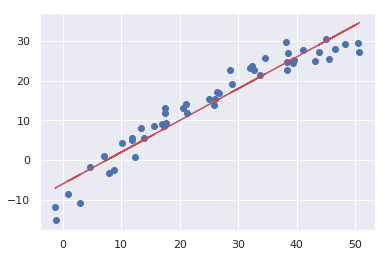

In [83]:
y_candidate = 0.8*x1-6

plt.scatter(x1,y)
plt.plot(x1,y_candidate,'r')

Which is actually pretty good. It's not perfect, because our actual data *doesn't* have a linear relationship, but a polynomial one.

My understanding is that there are solvers for this kind of thing using matrices. I don't have any desire to delve to deeply into that math, just to acknowledge that they exist, and are built into sklearn. Let's have a quick look:

In [84]:
from sklearn import linear_model

In [85]:
reg = linear_model.LinearRegression()

In [86]:
x1.shape

(50,)

First I need to re-shape the data into an $NxM$ grid of features and data points, even though we currently only have one feature.

In [92]:
X =x1.reshape(50,1)

In [93]:
X[:10]

array([[-1.1157973 ],
       [-1.3003243 ],
       [ 2.99691822],
       [ 0.88645726],
       [ 4.70165061],
       [11.82183632],
       [ 7.10953946],
       [10.19965776],
       [ 8.68466633],
       [ 7.95023338]])

And then we can fit to our data.

In [94]:
reg.fit(X,y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
reg.coef_

array([0.80004269])

In [96]:
reg.intercept_

-5.942137820010007

i.e. $a=0.8, b=-5.9$

In [97]:
loss(0.79705554,-6.132263083526283)

11.32624729819108

Which is very similar to what we estimated visually.

Next up we'll introduce polynomial terms to get a more accurate fit.